# **Mayuri Jitendrabhai Vagh**

# The Sparks Foundation

# Task 1: Predict the Percentage of student based on the number of study hours and Second What will be the predict score if student studies for 9.25hrs/day. 








**Import Libraries**

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

## **Importing Database**

In [50]:
data_frame = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

**Print Head of the data means top 5 data**

In [51]:
data_frame.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Check If there any data null**

In [52]:
data_frame.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [53]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**list of columns**

In [54]:
print(list(data_frame.columns))

['Hours', 'Scores']


**Define X and Y for model**

In [55]:
X = data_frame["Hours"].values.reshape(-1,1)
Y = data_frame["Scores"].values.reshape(-1,1)

**Simple Visualising the data**

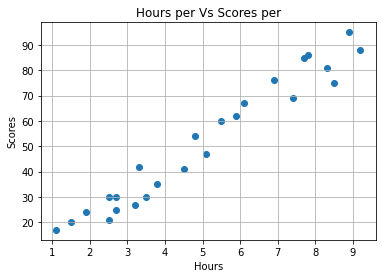

In [56]:
plt.scatter( X , Y , color = "#1f77b4" )
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours per Vs Scores per")
plt.grid()
plt.show()


**Slpting data for model the data**

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

**Create linear Regression**

In [58]:
Linear_Regression = LinearRegression()

**Fit the X and Y value in linear regression**

In [59]:
Linear_Regression.fit(x_train,y_train)

LinearRegression()

In [60]:
coefficients = Linear_Regression.coef_ * X + Linear_Regression.intercept_

In [61]:
coefficients

array([[26.8422321 ],
       [52.29250548],
       [33.69422878],
       [85.57363222],
       [36.63079879],
       [17.05366541],
       [92.4256289 ],
       [56.20793216],
       [83.61591888],
       [28.79994544],
       [77.74277887],
       [60.12335883],
       [46.41936547],
       [34.67308545],
       [13.13823874],
       [89.48905889],
       [26.8422321 ],
       [20.96909209],
       [62.08107217],
       [74.80620886],
       [28.79994544],
       [49.35593548],
       [39.56736879],
       [69.91192552],
       [78.72163554]])

**Visualising Train Data**

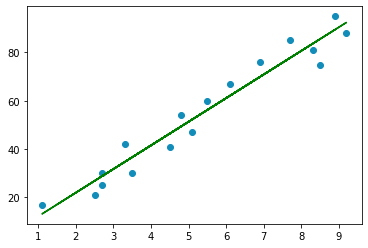

In [62]:
plt.scatter(x_train , y_train , color = "#128cb9")
plt.plot(X , coefficients , color = "green")
plt.show()

**Predictions**

In [63]:
Y_pred = Linear_Regression.predict(x_test)
Y_pred

array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

**Test Data**

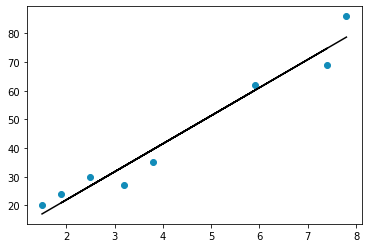

In [64]:
plt.scatter(x_test,y_test , color = "#128cb9")
plt.plot(x_test,Y_pred , color = "black")
plt.show()

**Data Frame with Actul score and prediceted score**

In [65]:
data_frame_predict = pd.DataFrame({"Hours": x_test.reshape(1,-1)[0] , "Score" : y_test.reshape(1,-1)[0] , "Predicted Score" : Y_pred.reshape(1,-1)[0]})
data_frame_predict

,Hours,Score,Predicted Score
0,1.5,20,17.053665
1,3.2,27,33.694229
2,7.4,69,74.806209
3,2.5,30,26.842232
4,5.9,62,60.123359
5,3.8,35,39.567369
6,1.9,24,20.969092
7,7.8,86,78.721636


**Sorted data predict and score**

In [66]:
data_frame_sorted = data_frame_predict.sort_values(by = "Hours")
data_frame_sorted

,Hours,Score,Predicted Score
0,1.5,20,17.053665
6,1.9,24,20.969092
3,2.5,30,26.842232
1,3.2,27,33.694229
5,3.8,35,39.567369
4,5.9,62,60.123359
2,7.4,69,74.806209
7,7.8,86,78.721636


**Actual Values Vs Predicted Values**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


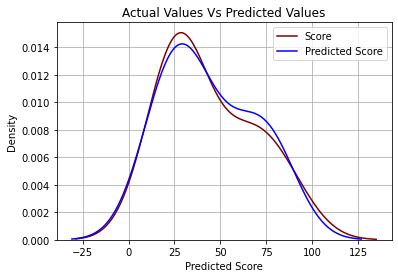

In [67]:
title = "Actual Values Vs Predicted Values"
ax1 = sns.distplot(data_frame_sorted["Score"], hist = False , color = "maroon" , label = "Score")
sns.distplot(data_frame_sorted["Predicted Score"] , hist = False , color = "blue" , label = "Predicted Score" , ax = ax1)
plt.legend()
plt.grid()
plt.title(title)
plt.show()

**Evaluating the model**
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [68]:

mean_absolute_error=metrics.mean_absolute_error(y_test,Y_pred)
print('Mean absolute error:',mean_absolute_error)

corr=r2_score(y_train,lr.predict(x_train))
print('correlation:',corr)

acc=r2_score(y_test,Y_pred)
print('Accuracy:',acc)

Mean absolute error: 4.419727808027651
correlation: 0.9482028641050564
Accuracy: 0.9568211104435257


**Predictions**

In [69]:
hrs = 9.25
pred = Linear_Regression.predict([[9.25]])
print("The predicted score if a student studies for 9.25 hrs/ day is",pred[0])

The predicted score if a student studies for 9.25 hrs/ day is [92.91505723]
